In [94]:
import pandas as pd
import numpy as np

%matplotlib inline

# Functions

In [83]:
def get_pub_year(date_value):
    
    if type(date_value) is int or type(date_value) is str:
        date_str = str(date_value)
    else:
        return int(date_value.year)
        
    if len(date_str) == 4:
        
        return int(date_str)
    
    else:
        
        date_split = date_str.replace('-', ' ').split(' ')
        
        for x in date_split:
            if len(x) == 4:
                if x[0] in ['1', '2'] and x[1] in ['9', '0']:
                    return int(x)
                
    raise ValueError('Error processing: ', date_str)

In [84]:
def get_method(method_info):
    
    method_info = method_info.lower()
    
    if 'summary' in method_info:
        return 'Summary'
    elif 'BECCS' in method_info:
        return 'BECCS'
    elif 'Oceanic' in method_info:
        return 'Oceanic Iron Cycle'
    else: 
        return 'Other'

# Import Data

In [85]:
data_file = '../data/metastudy/BIOCCS Chart EDITED.xlsx'

In [86]:
rawdata = pd.read_excel(data_file, header = 1)

# Clean Data

In [87]:
data_df = rawdata.copy()

In [88]:
# clean up dates
data_df['PubYear'] = data_df['Date of publish'].apply(get_pub_year)
data_df['ResYear'] = data_df['Date of research'].apply(get_pub_year)

In [89]:
data_df.head()

,Name of paper,Name of author,Date of publish,Date of research,Technology used,Cost/tC02 in Dollars,CO2 Yield/year,Total Cost,Constraints,Benefits,Projection Date,Assumptions,Summary,Cost_clean,Yield_clean,PubYear,ResYear
0,Direct Air Capture of CO2 With Chemicals,Robert Socolow,2011-06-01 00:00:00,2009-03-01 00:00:00,DAC with chemicals,600<,1 Mt,$2.2 billion,"Geography, water vapor, O2 concentration, Cost",Used in decentralized areas,NaN,Small scale adoption of the technology is poss...,The technology is in the concept stage and has...,600.0,1.0,2011,2009
1,*Agronomic values of greenwaste biochar as a s...,K.Y. Chan,2007,2007,Bio Char,NaN,NaN,NaN,NaN,Can be combined with nitrogen fertiliser to pr...,NaN,"If it can become cheap enough, wide spread ado...","When combined with ntrogen fertiliser, biochar...",NaN,NaN,2007,2007
2,*Biochar Application to Soil:\nAgronomic and E...,R. S. Kookana,2011,2011,Bio Char,NaN,NaN,NaN,"reduced efficacy, persistence of agrochemicals...",Increased fertility,NaN,Bio char must be studied more to fully underst...,"At the moment, despite some inital benefits, m...",NaN,NaN,2011,2011
3,*Biochar effects on soil biota-A review,Johannes Lehmann,2011,2010,Bio Char,NaN,NaN,NaN,"environmental risks, lack of research","Increased microorganisms,",NaN,Bio char must be studied more to fully underst...,"Despite some initial gains in soil fertility, ...",NaN,NaN,2011,2010
4,*A Review of Biochar and\nIts Use and Function...,S. P. Sohi,2010,2010,Bio Char,NaN,1 Gt,NaN,"environmental risks, lack of research, insttut...",Increased crop yield,NaN,Bio char can could be used efficiently to incr...,Bio char has many obstacles blocking and requi...,NaN,1000.0,2010,2010


# Descriptive Statistics

In [92]:
data_df['Cost_clean'].describe()

count      16.000000
mean      276.723750
std       372.535568
min         8.200000
25%        51.750000
50%        73.460000
75%       565.000000
max      1255.000000
Name: Cost_clean, dtype: float64

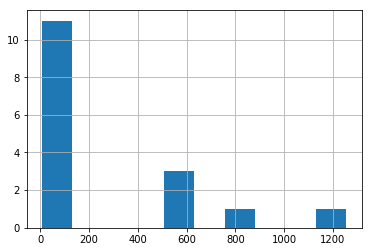

In [97]:
data_df['Cost_clean'].hist(bins = 10)

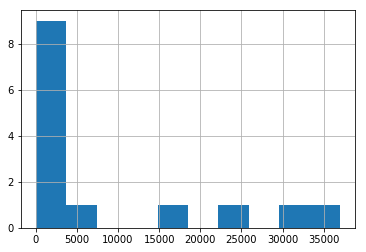

In [100]:
data_df['Yield_clean'].hist(bins = 10)